<a href="https://colab.research.google.com/github/ds4ph-bme/project-3-HerambGupta/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do a scatterplot of the left telencephalon **(type 1 level 1) volume** by the right. The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv) 
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot. 
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that 
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing 
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$. 
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Consider the Kirby 21 data. Plot a scatter plot of the left diencephalon (type 1 level 1) and the right. Find the best line fit for predicting the right using the left. Plot the line on the scatterplot. Find the best fit line for predicting the left using the right as a predictor. Plot this on the same plot.
7. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. 

In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dat=pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")

#Question 1

[Text(0.5, 1.0, 'Left V/S Right')]

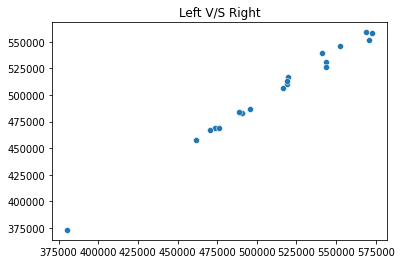

In [8]:
l_v=dat.volume[(dat.roi=='Telencephalon_L') & (dat.type==1) & (dat.level==1)].tolist()
r_v=dat.volume[(dat.roi=='Telencephalon_R') & (dat.type==1) & (dat.level==1)].tolist()
store=(l_v,r_v)

sns.scatterplot(x=r_v,y=l_v).set(title='Left V/S Right')

#Question 2

We know that: $ \bar Y  =  \hat \beta_0 + \bar X \hat \beta_1 $

However, we need to plot the regression through origin, therefore $ \hat \beta_0 =0 $

Thus: $ \bar Y  =  \bar X \hat \beta_1 $

$ \hat \beta_1 = Cor(X, Y) \frac{SD_Y}{SD_X} $


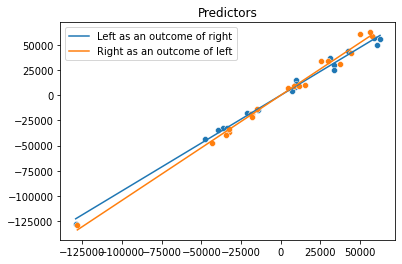

In [9]:
l_v=l_v-np.mean(l_v)
r_v=r_v-np.mean(r_v)

#left as an outcome of right i.e left is Y variable, right is X variable
b1 = st.pearsonr(x=r_v,y= l_v)[0] * np.std(l_v) / np.std(r_v)
sns.scatterplot(x=r_v, y=l_v)
sns.lineplot(x=r_v,y= b1*r_v)

#right as an outcome of left i.e right is Y variable, left is X variable
b1 = st.pearsonr(l_v,r_v)[0] * np.std(r_v) / np.std(l_v)
sns.scatterplot(x=l_v,y= r_v)
sns.lineplot(x=l_v,y= b1*l_v)

plt.title('Predictors')
plt.legend(['Left as an outcome of right','Right as an outcome of left'])

#Question 3

If  $Y=BX $ is a regression through origin model, if we replace $X$ with $cX$ then $B$ changes. The new $B$ ie $B_c$ namely can be expressed as:
$$ B_c = \dfrac{B}{c} $$

#Question 4

Given $ X_i$ a group indicator so that it takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0.  
$$
X_i = I(i \in G_1)
$$

Given $\hat Y = \hat \beta_0 + \hat \beta_1 X$

When $X_i = 1,$ 
So we need to optimize,
$$\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2
$$
$\beta_0$ can be given as:

$$ \beta_0 = \dfrac {\sum_{i=1}^n Y_i X_i}{\sum_{i=1}^n X_i} $$
Therefore,
$$ \hat\beta_0 = \bar Y_1 $$

When $X_i =0$, We need to optimize:
$$\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 (1 - X_i))^2
$$
Therefore,

$$ \hat \beta_1 = \bar Y_0 $$

Since the line passes through the origin, the line has to fit both the points making the slope equivalent to determining $ \hat Y$

Thus, $\hat Y = Y_0$ for group zero and $\hat Y =Y_1$ for group 1, ie their group means. 

Hence proved.


#Question 5

In [6]:
def question5 (x,y):
  b1 = np.sum(y*x)/np.sum(x**2)
  b0 = np.mean(y) - np.mean(x) * b1
  return [b1,b0]

#Question 6

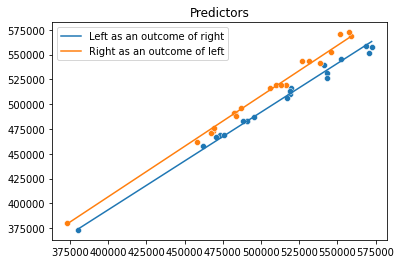

In [10]:
l_v,r_v=store
r_v=np.array(r_v)
l_v=np.array(l_v)
#left as an outcome of right i.e left is Y variable, right is X variable
b1 = question5(r_v,l_v)[0]
b0 = question5(r_v,l_v)[1]
sns.scatterplot(x=r_v,y= l_v)
sns.lineplot(x=r_v,y= b0 + b1*r_v)

#right as an outcome of left i.e right is Y variable, left is X variable
b1 = question5(l_v,r_v)[0]
b0 = question5(l_v,r_v)[1]
sns.scatterplot(x=l_v,y= r_v)
sns.lineplot(x=l_v,y= b0 + b1*l_v)
plt.title('Predictors')
plt.legend(['Left as an outcome of right','Right as an outcome of left'])

#Question 7

We know that:
$ \hat \beta_1 = \dfrac{\sum (y-y_i) (x_i - \bar x)} {\sum (x_1 - \bar x)^2} $

$ = Cor(X, Y) \frac{\sigma_y}{\sigma_x}$

Now,  $ y= \dfrac{y}{\sigma_y}$ and  $x= \dfrac{x}{\sigma_x} $

$ \hat \beta_1s = \dfrac{\sum (\dfrac{y}{\sigma_y}-\dfrac{y_i}{\sigma_y}) (\dfrac{x_i}{\sigma_x} - \dfrac{\bar x}{\sigma_x})} {\sum (\dfrac{x_i}{\sigma_x} - \dfrac{\bar x}{\sigma_x})^2} $



$ \hat \beta_1s = \dfrac{\sum (y-y_i) (x_i - \bar x) \dfrac{1}{\sigma_y} \dfrac{1}{\sigma_x}} {\sum (x_i - \bar x)^2 \dfrac{1}{\sigma_x^2}}$


$ \hat \beta_1s = \hat \beta_1 \dfrac{\sigma_x}{\sigma_y}$

$ \hat \beta_1s = Cor(X, Y) \frac{\sigma_y}{\sigma_x} \dfrac{\sigma_x}{\sigma_y} $

$ \hat \beta_1s = Cor(X, Y)$

Hence proved.
